In [ ]:
def examine_N_lambda2_impact_bin(S, w, sigma, N_values, lambda2_values, lr, lambda1, train_ratio=0.8):
    """
    Parameters:
    S (ndarray): Generator matrix
    w (ndarray): True weight vector
    sigma (float): Noise variance
    N_values (list): List of N values (sample sizes)
    lambda2_values (list): List of lambda_2 values (L2 regularization)
    lr (float): Learning rate for gradient descent
    lambda1 (float): L1 regularization parameter
    train_ratio (float): Ratio of data to use for training
    
    Returns:
    error_matrix (ndarray): Classification error for each combination of N and lambda_2
    """
    error_matrix = np.zeros((len(N_values), len(lambda2_values)))

    for i, N in enumerate(N_values):
        X = generate_data_matrix(N, S)  # Generate input matrix X for current N
        t_binary = generate_binary_target_vector(X, w, sigma)  # Generate binary target vector
        
        train_size = int(train_ratio * N)

        for j, lambda2 in enumerate(lambda2_values):
            error_vals = []

            for _ in range(5):  # Repeat experiment 5 times
                # Split data into training and validation sets
                X_train, X_val = X[:train_size], X[train_size:]
                t_train, t_val = t_binary[:train_size], t_binary[train_size:]

                # Initialize random weights
                w_init = np.random.randn(X.shape[1] + 1)

                # Perform gradient descent
                w_opt = gradient_descent(X_train, t_train, w_init, lr, lambda1, lambda2)

                # Predict on validation set and calculate binary classification error
                z_val = np.dot(X_val, w_opt[:-1]) + w_opt[-1]
                y_val_pred = sigmoid(z_val) >= 0.5  # Convert probabilities to binary predictions
                error = np.mean(y_val_pred != t_val)  # Classification error (misclassification rate)
                error_vals.append(error)

            error_matrix[i, j] = np.mean(error_vals)  # Average error for current N and $\lambda_2$

    # Plotting error as a heatmap
    plt.imshow(error_matrix, cmap='hot', interpolation='nearest', aspect='auto')
    plt.colorbar(label="Classification Error")
    plt.xticks(range(len(lambda2_values)), lambda2_values, rotation=45)
    plt.yticks(range(len(N_values)), N_values)
    plt.xlabel(r"$\lambda_2$ values")
    plt.ylabel("N values")
    plt.title(r"Classification Error for combinations of N and $\lambda_2$")
    plt.show()

    return error_matrix

#### Example Test

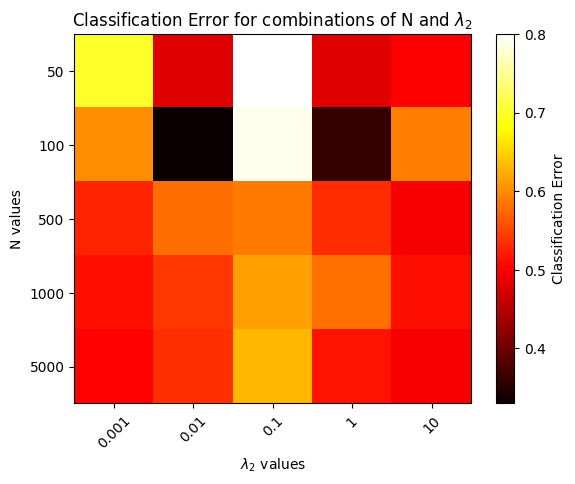

In [ ]:
N_values = [50, 100, 500, 1000, 5000]  # Sample sizes
lambda2_values = [0.001, 0.01, 0.1, 1, 10]  # $\lambda_2$ values in log scale
error_matrix = examine_N_lambda2_impact_bin(S, w, sigma=0.1, N_values=N_values, lambda2_values=lambda2_values, lr=0.001, lambda1=0.1)